In [1]:
from IPython.display import Image

# kMeans From Scratch

Source:
- Aditri Srivastava, K-means Clustering, https://medium.com/analytics-vidhya/k-means-clustering-3ce2456db7f1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [3]:
# Distance between two points Euclidian Distance
def distance(a1,a2):
    return np.sqrt(np.sum((a1-a2)**2))

class KMeans():
    def __init__(self,k=5,max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.clusters = {}
        self.label = []
        
    def initialization(self, X):
        for i in range(self.k):
            center=np.zeros((2,))
            # cx = np.random.uniform(low=38.8250, high=39.0000)
            # cy = np.random.uniform(low=-76.9, high=-77.15)
            cx = np.random.uniform(low=-6, high=4)
            cy = np.random.uniform(low=-6, high=4)
            center[0] = cx
            center[1] = cy
            #center = 10*(2*np.random.random((X.shape[1],))-1)
            points = []
            cluster = {
                'center':center,
                'points':points,
                'id'    :i
            }
            self.clusters[i]=cluster
        self.label = np.zeros((X.shape[0],1))
    
    def assignPointTOClusters(self, X):
        for i in range(X.shape[0]):
            dist = []
            curr_x = X[i]
        
            for ki in range(self.k):
                d = distance(curr_x,self.clusters[ki]['center'])
                dist.append(d)
            
            current_cluster = np.argmin(dist)
            self.clusters[current_cluster]['points'].append(curr_x)
            self.label[i]=(self.clusters[current_cluster]['id'])
            
    def check(self,old_c,new_c):
        distances = [distance(old_c[i], new_c[i]) for i in range(self.k)]
        return sum(distances) == 0
        
    def updateClusters(self):
        for kx in range(self.k):
            pts = np.array(self.clusters[kx]['points'])
            
            if pts.shape[0]>0: # If cluster has some nonzero points
                new_u = pts.mean(axis=0)
                self.clusters[kx]['center'] = new_u
                # Clear the list
                self.clusters[kx]['points'] = []
    
    def plotClusters(self):
        for kx in range(self.k):
            print(len(self.clusters[kx]['points']))
            pts = np.array(self.clusters[kx]['points'])
            # plot points , cluster center
            try:
                plt.scatter(pts[:,0],pts[:,1])
            except:
                pass
            uk = self.clusters[kx]['center']
            plt.scatter(uk[0],uk[1],color='black',marker="*")
        plt.show()
            
    def fit(self, X):
        print(self.k)
        self.initialization(X)
        for i in range(self.max_iter):
            print("i is ",i)
            self.assignPointTOClusters(X)
            self.plotClusters()
            old_c = [self.clusters[i]['center'] for i in range(self.k)]
            self.updateClusters()
            new_c = [self.clusters[i]['center'] for i in range(self.k)]
            if self.check(old_c,new_c):
                break

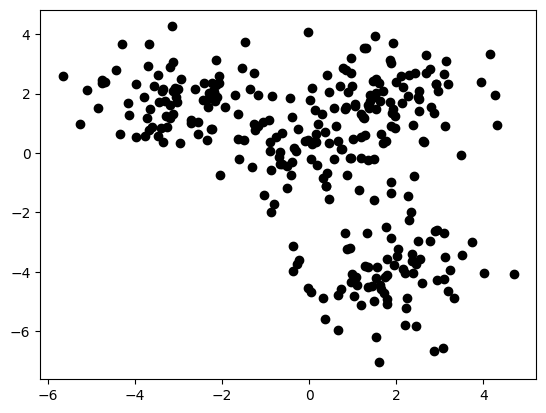

In [4]:
centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='black')
plt.show()

4
i is  0
72
47
181
0


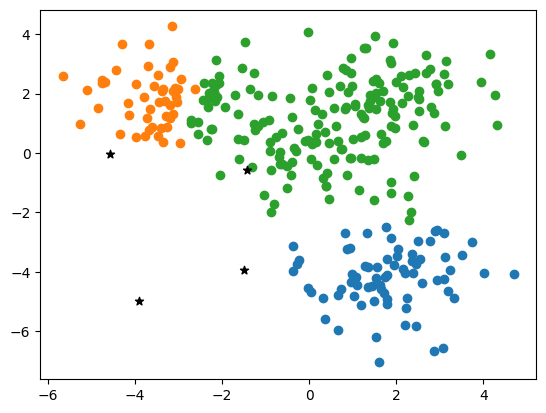

i is  1
77
75
148
0


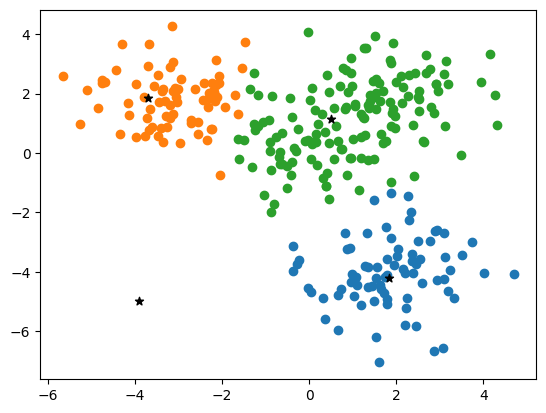

i is  2
77
83
140
0


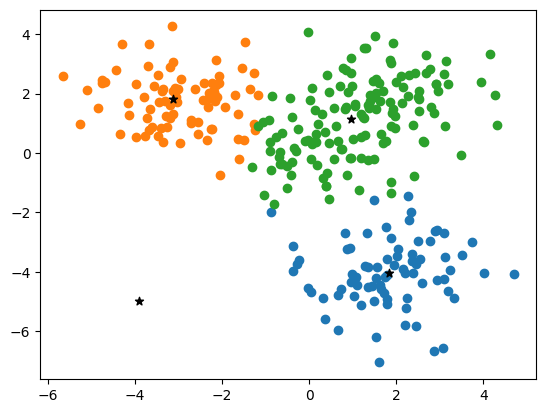

i is  3
77
87
136
0


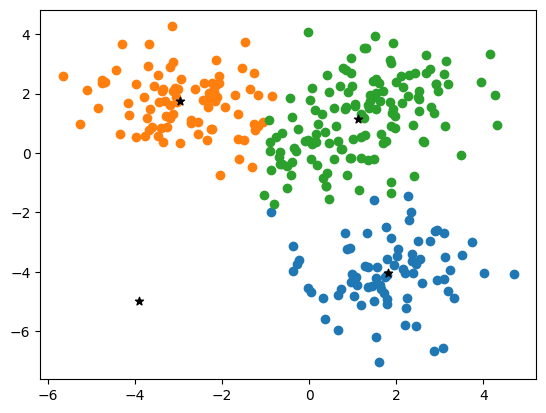

i is  4
78
88
134
0


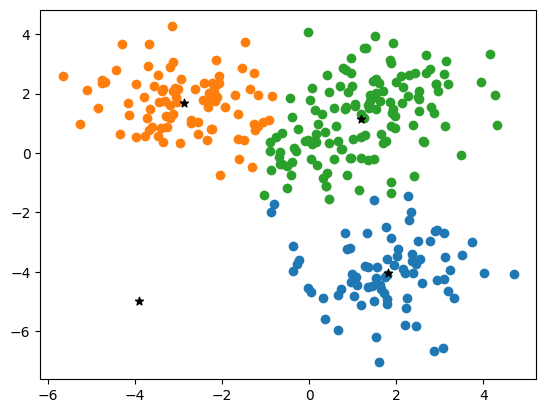

i is  5
79
88
133
0


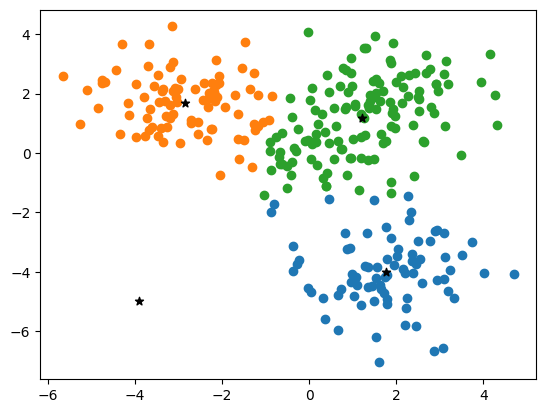

i is  6
79
88
133
0


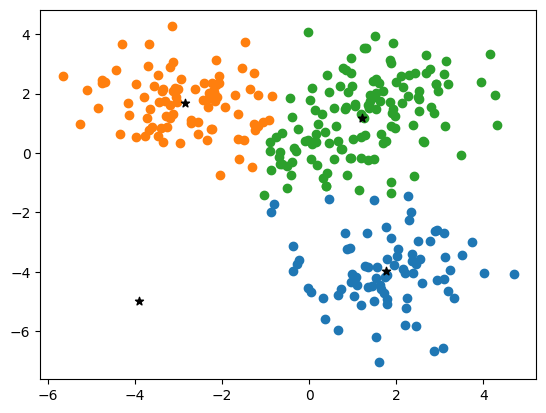

In [5]:
kmeans = KMeans(k=4, max_iter=300)
kmeans.fit(X)

# kMeans++ From Scratch

Source:
- Lance Galletti, Kmeans ++ From Scratch, https://medium.com/@gallettilance/kmeans-from-scratch-24be6bee8021

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [7]:
class KMeanspp():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]

    def _is_unassigned(self, i):
        return self.assignment[i] == -1
    
    def _unassign_all(self):
        self.assignment = [-1 for _ in range(len(self.data))]

    def _is_centers_diff(self, c1, c2):
        for i in range(self.k):
            if self.dist(c1[i], c2[i]) != 0:
                return True
        return False

    def dist(self, x, y):
        return sum((x - y) ** 2) ** (1/2)

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)), size=self.k, replace=False)]

    def kmeans_plusplus(self):
        centroids = self.data[np.random.choice(range(len(self.data)), size=1)]

        for _ in range(1, self.k):
            min_sq_dist = [min([
                self.dist(c, x) ** 2 
                for c in centroids]) 
                for x in self.data]
            prob = min_sq_dist / sum(min_sq_dist)
            centroids = np.append(centroids,
                self.data[np.random.choice(range(len(self.data)), size=1, p=prob)],
                axis=0
            )
        return centroids

    def assign(self, centers):
        for i in range(len(self.data)):
            for j in range(self.k):
                if self._is_unassigned(i):
                    self.assignment[i] = j
                    dist = self.dist(self.data[i], centers[j])
                else:
                    temp_dist = self.dist(self.data[i], centers[j])
                    if temp_dist < dist:
                        self.assignment[i] = j
                        dist = temp_dist

    def compute_centers(self):
        centers = []
        for j in range(self.k):
            cluster = np.array([self.data[k] for k in filter(lambda x : x >= 0, 
            [i if self.assignment[i] == j else -1 for i in range(len(self.data))])])
            centers.append(np.mean(cluster, axis=0))
        return np.array(centers)

    def lloyds(self):
        centers = self.kmeans_plusplus()
        self.assign(centers)
        # self.snap(centers)
        new_centers = self.compute_centers()
        while self._is_centers_diff(centers, new_centers):
            self._unassign_all()
            centers = new_centers
            self.assign(centers)
            # self.snap(centers)
            new_centers = self.compute_centers()

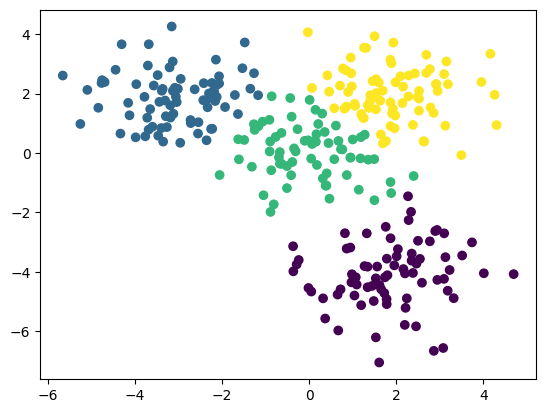

In [8]:
centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

kmeans = KMeanspp(X, 4)
kmeans.lloyds()

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=kmeans.assignment)
plt.show()